<a href="https://colab.research.google.com/github/yamsunar089/YAMcn6005_portfolio/blob/main/week2_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this lab, I learned how to build and evaluate a Linear Regression model using the diabetes dataset. I first split the data into training and testing sets, which helped me understand how models are trained and then tested on unseen data. I evaluated the model using Mean Squared Error (MSE) and R² score, which showed how well the model predicted the target values.

After building the model, I learned about SHAP (SHapley Additive exPlanations) and how it is used to explain machine learning models. SHAP helped me understand how each feature contributes to the model’s predictions instead of treating the model like a black box.

The summary plot showed which features had the most overall impact on predictions, while the bar plot clearly ranked feature importance. I also used dependence plots to see how individual features such as BMI, blood pressure, and age affected the predictions.

Overall, this lab helped me understand not only how to build a model, but also how to explain and interpret its results, which is important for trustworthy machine learning.

If you want, I can:

Make it simpler

Reduce it to under 120 words

Rewrite it in very basic English

Add a short limitations or improvements sentence

Just let me know

Mean Squared Error: 2900.19
R² Score: 0.45


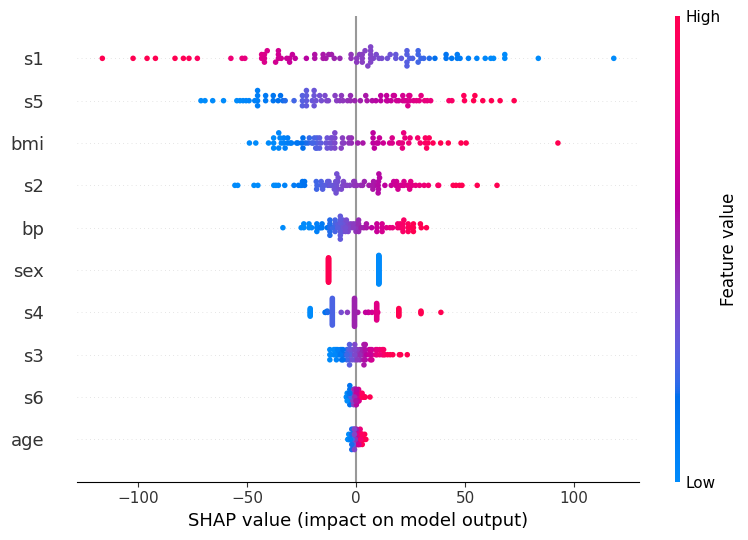

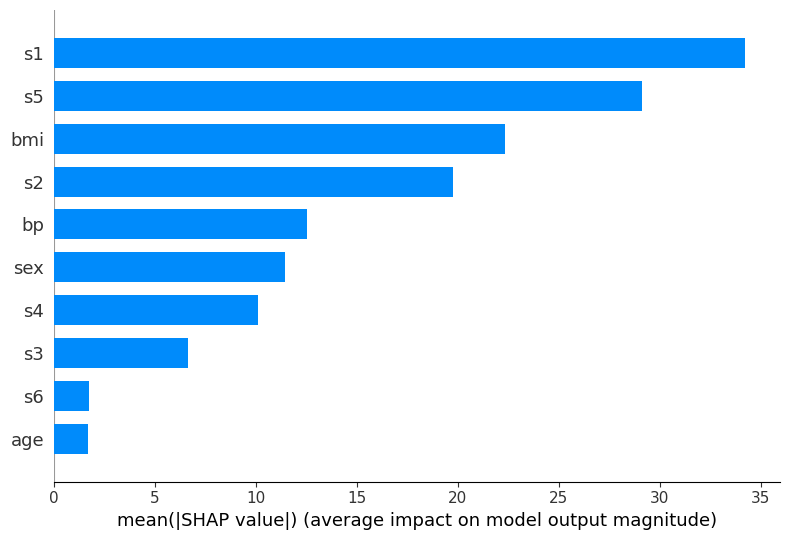

In [ ]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="target")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict + evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", round(mse, 2))
print("R² Score:", round(r2, 2))

# SHAP explainability
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

# Bar plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


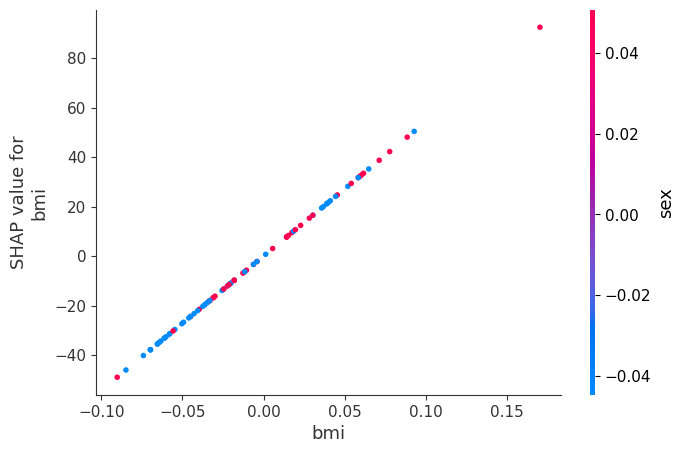

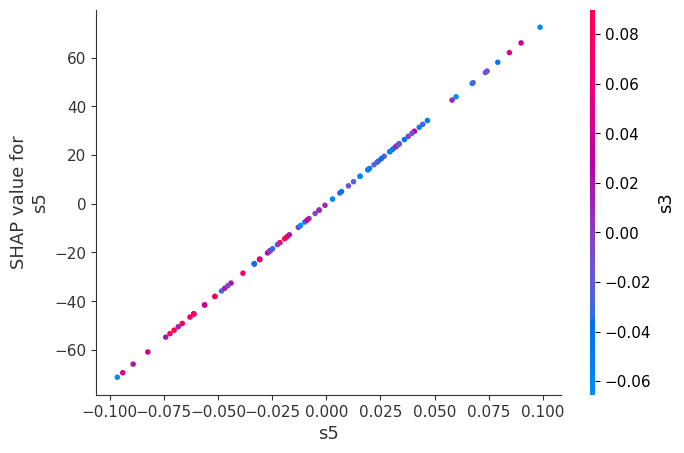

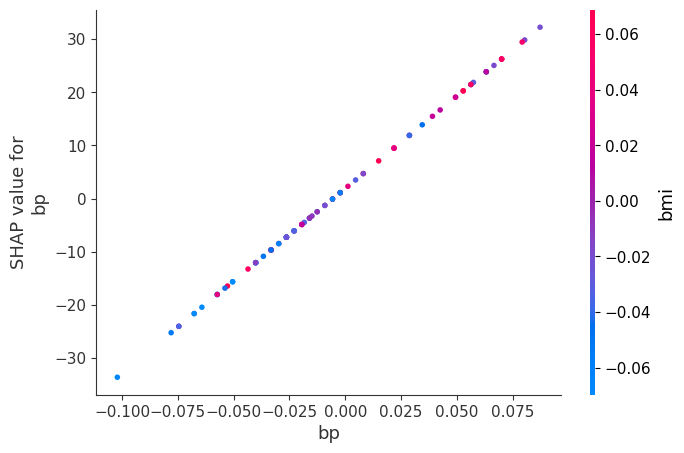

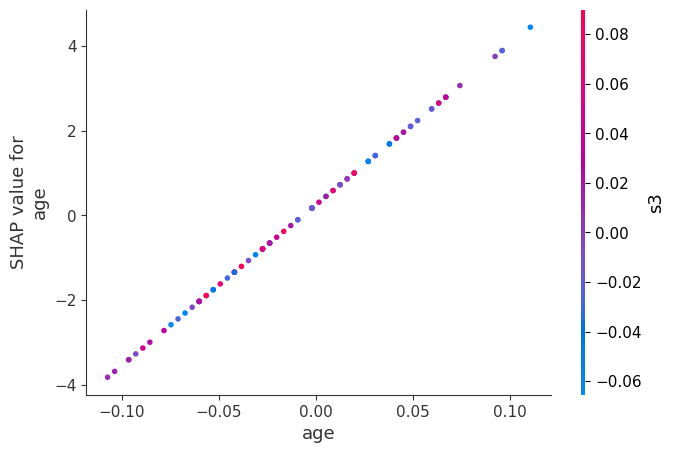

In [ ]:
selected_features = ["bmi", "s5", "bp", "age"]

for f in selected_features:
    shap.dependence_plot(
        f,
        shap_values.values,
        X_test,
        feature_names=X_test.columns
    )
    plt.savefig(f"shap_dependence_{f}.png")
    plt.close()
